# Modeling Notebook

## Baseline Models

In [263]:
# import data
import pandas as pd

data = pd.read_csv("data/cleaned_data_baseline.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Columns: 166 entries, application_order to father_job_Workers in food processing, woodworking, clothing and other industries and crafts
dtypes: float64(10), int64(156)
memory usage: 5.6 MB


### Preparing Data

In [264]:
X = data.drop(columns=["target"])
y = data["target"]

X.shape, y.shape

((4424, 165), (4424,))

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape

((3539, 165), (885, 165))

## Training Baseline Models

#### Decision Tree

In [266]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.6870056497175141

In [267]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

dt_predictions = dt.predict(X_test)
print({"Enrolled": 1, "Dropout": 0, "Graduate": 2})
confusion_matrix(y_test, dt_predictions, normalize="true")

{'Enrolled': 1, 'Dropout': 0, 'Graduate': 2}


array([[0.69303797, 0.17088608, 0.13607595],
       [0.25165563, 0.35761589, 0.39072848],
       [0.08133971, 0.11722488, 0.80143541]])

#### Naive Bayes

In [268]:
from sklearn.naive_bayes import GaussianNB

naive_classifier = GaussianNB()
naive_classifier.fit(X_train, y_train)
naive_classifier.score(X_test, y_test)

0.3638418079096045

In [269]:
naive_predictions = naive_classifier.predict(X_test)
confusion_matrix(y_test, naive_predictions)

array([[308,   6,   2],
       [139,  10,   2],
       [399,  15,   4]], dtype=int64)

#### XGBoost

In [270]:
from xgboost import XGBClassifier

xgboost_classifier = XGBClassifier(random_state=42)
xgboost_classifier.fit(X_train, y_train)
xgboost_classifier.score(X_test, y_test)

0.7638418079096045

In [271]:
xg_predictions = xgboost_classifier.predict(X_test)
confusion_matrix(y_test, xg_predictions)

array([[232,  39,  45],
       [ 35,  59,  57],
       [ 12,  21, 385]], dtype=int64)

## Baseline Models with Binary Classifier

The more advanced models tend to error on the side of missing those who actually do dropout.

Our first attempts at fitting a binary classifier all were overfit. To reduce this we can make our trees smaller or use less features in each bootstrapped model for the Random Forest

In [272]:
y = y.map({2: 0, 1: 0, 0: 1})
y.value_counts()

target
0    3003
1    1421
Name: count, dtype: int64

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape

((3539, 165), (885, 165))

### Decision Tree

In [274]:
dt_binary = DecisionTreeClassifier(random_state=42)
dt_binary.fit(X_train, y_train)
dt_binary.score(X_test, y_test)

0.7954802259887006

In [275]:
dt_binary_predictions = dt_binary.predict(X_test)
print(dt_binary.score(X_train, y_train))
confusion_matrix(y_test, dt_binary_predictions)

1.0


array([[482,  87],
       [ 94, 222]], dtype=int64)

In [276]:
print(classification_report(y_test, dt_binary_predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       569
           1       0.72      0.70      0.71       316

    accuracy                           0.80       885
   macro avg       0.78      0.77      0.78       885
weighted avg       0.79      0.80      0.79       885



### XGBoost

In [277]:
xgboost_binary = XGBClassifier(random_state=42)
xgboost_binary.fit(X_train, y_train)
xgboost_binary.score(X_test, y_test)

0.8508474576271187

In [278]:
xgboost_binary_predictions = xgboost_binary.predict(X_test)
print(xgboost_binary.score(X_train, y_train))
confusion_matrix(y_test, xgboost_binary_predictions)

0.99745690873128


array([[527,  42],
       [ 90, 226]], dtype=int64)

In [279]:
print(classification_report(y_test, xgboost_binary_predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       569
           1       0.84      0.72      0.77       316

    accuracy                           0.85       885
   macro avg       0.85      0.82      0.83       885
weighted avg       0.85      0.85      0.85       885



### Random Forest

In [280]:
from sklearn.ensemble import RandomForestClassifier

rf_binary = RandomForestClassifier(random_state=42)
rf_binary.fit(X_train, y_train)
rf_binary.score(X_test, y_test)

0.8531073446327684

In [281]:
rf_predictions = rf_binary.predict(X_test)
print(rf_binary.score(X_train, y_train))
confusion_matrix(y_test, rf_predictions)

1.0


array([[538,  31],
       [ 99, 217]], dtype=int64)

In [282]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       569
           1       0.88      0.69      0.77       316

    accuracy                           0.85       885
   macro avg       0.86      0.82      0.83       885
weighted avg       0.86      0.85      0.85       885



### Support Vector Machine

In [283]:
from sklearn.svm import SVC

svc = SVC(C=0.3, random_state=42, probability=True)
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(classification_report(y_test, svc.predict(X_test)))

0.817745125741735
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       569
           1       0.86      0.48      0.62       316

    accuracy                           0.79       885
   macro avg       0.82      0.72      0.73       885
weighted avg       0.80      0.79      0.77       885



### ROC Curves

In [284]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use([i for i in plt.style.available if "seaborn" in i][0])

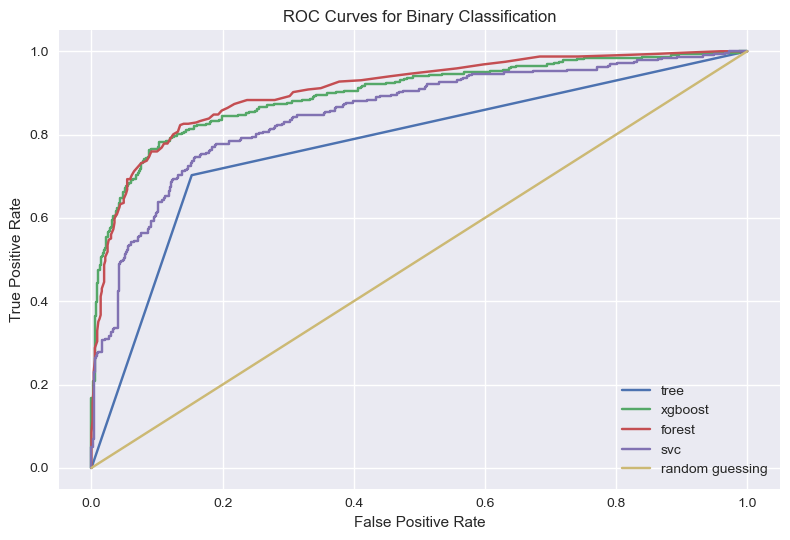

In [285]:
fig, ax = plt.subplots()

for name, model in [("tree", dt_binary), ("xgboost", xgboost_binary), ("forest", rf_binary), ("svc", svc)]:
    # get data for curve
    probabilities = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probabilities)

    # plot curve
    ax.plot(fpr, tpr, label=name)

# some labels
ax.plot(np.linspace(0, 1), np.linspace(0, 1), label="random guessing")
ax.set_title("ROC Curves for Binary Classification")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
plt.tight_layout()

## Fighting Overfitting

With the Random Forest model, there are some easy to tune parameters to avoid overly deep trees

### Attempted Grid Search

This was not successful because the parameters I tried were worse than defaults.

In [286]:
from sklearn.model_selection import GridSearchCV

In [287]:
forest = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    "max_depth": [5, 10, 15, 30, 60],
    "ccp_alpha": [0.0, 0.1, 0.3, 0.6],
    "min_samples_split": [5, 15, 30]
}
tuned_forest = GridSearchCV(forest, param_grid)

In [288]:
tuned_forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.3, 0.6],
                         'max_depth': [5, 10, 15, 30, 60],
                         'min_samples_split': [5, 15, 30]})

In [289]:
tuned_forest.best_params_

{'ccp_alpha': 0.0, 'max_depth': 60, 'min_samples_split': 5}

In [290]:
tuned_forest.score(X_test, y_test)

0.848587570621469

### Some Standardization on Data

In [291]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [292]:
standard_scaler = StandardScaler()
forest = RandomForestClassifier(random_state=42)
standardized_forest = make_pipeline(standard_scaler, forest)

In [293]:
standardized_forest.fit(X_train, y_train)
standardized_forest.score(X_test, y_test)

0.8542372881355932

In [300]:
print(classification_report(y_test, standardized_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       569
           1       0.88      0.69      0.77       316

    accuracy                           0.85       885
   macro avg       0.86      0.82      0.83       885
weighted avg       0.86      0.85      0.85       885



### Try GridSearch on Standardized Data

In [294]:
standard_scaler = StandardScaler()

# grid search
param_grid = {
    "max_depth": [5, 10, 15, 30, 60],
    "ccp_alpha": [0.0, 0.1, 0.3, 0.6],
    "min_samples_split": [5, 15, 30]
}
forest = RandomForestClassifier(random_state=42)
tuned_forest = GridSearchCV(forest, param_grid, refit=True)
standardized_tuned_forest = make_pipeline(standard_scaler, tuned_forest)

In [295]:
standardized_tuned_forest.fit(X_train, y_train)
standardized_tuned_forest.score(X_test, y_test)

0.847457627118644

In [296]:
print(classification_report(y_test, standardized_tuned_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       569
           1       0.86      0.68      0.76       316

    accuracy                           0.85       885
   macro avg       0.85      0.81      0.82       885
weighted avg       0.85      0.85      0.84       885



### Try Class Imbalance Tuning

In [297]:
y.value_counts(normalize=True)

target
0    0.678797
1    0.321203
Name: proportion, dtype: float64

In [298]:
class_imbalance_forest = RandomForestClassifier(random_state=42, class_weight={0:7, 1:3})
class_imbalance_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 7, 1: 3}, random_state=42)

In [299]:
class_imbalance_forest.score(X_test, y_test)

0.8519774011299435